# DAWDLE Visualisation

In [2]:
from funcs_v1 import *
import matplotlib.pyplot as plt
import legwork.visualisation as vis
from matplotlib.colors import TwoSlopeNorm
import seaborn as sb
from visualization import *

In [3]:
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams['mathtext.default'] = 'regular'

In [4]:
obs_sec = 4 * u.yr.to('s')
obs_hz = 1 / obs_sec

## FIRE plots:

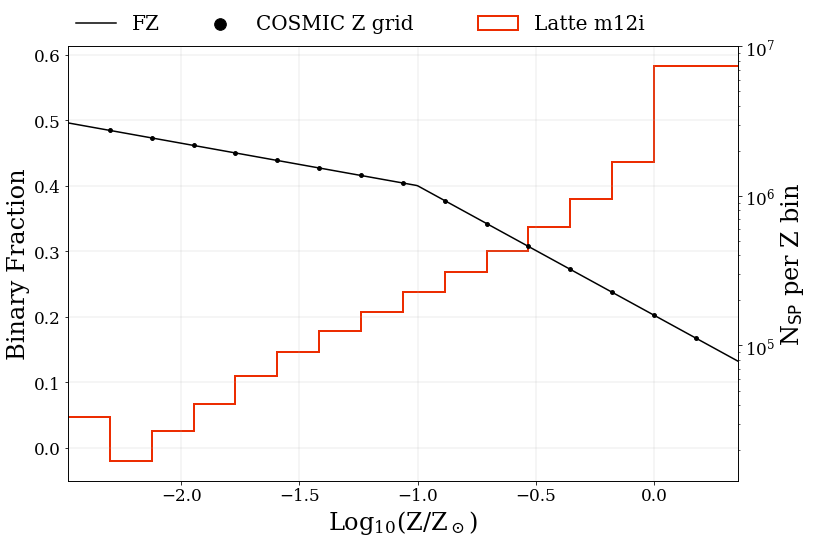

In [26]:
plot_FIRE_F_NSP()

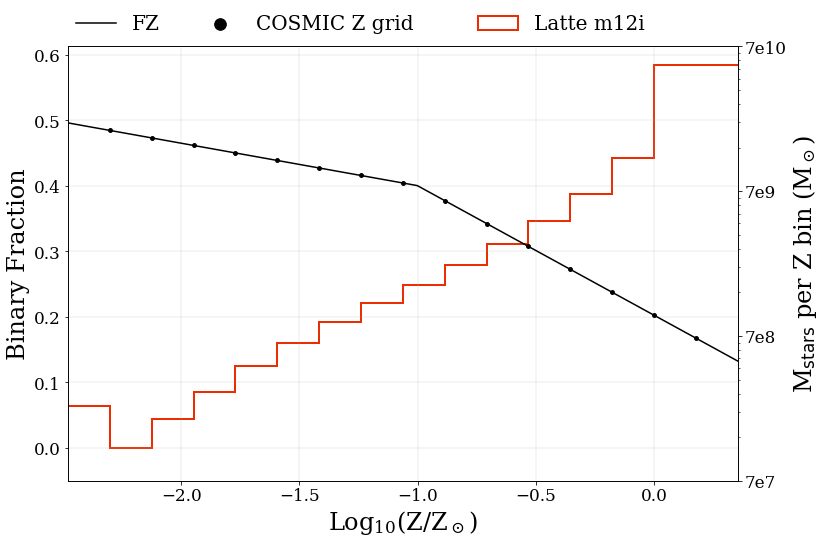

In [27]:
plot_FIRE_F_mass()

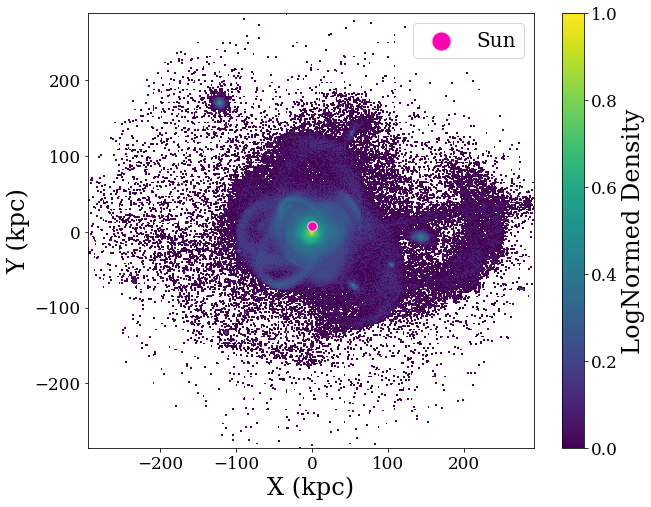

In [9]:
plot_FIREpos()

## Formation Efficiency:

#### Get formation efficiency files
#### __(Careful when running next cell!! Will overwrite previous files)__

In [ ]:
pathtodat = '../reduced_datfiles/reduced_'

pathtoeff = 'formeff/'

pathtoLband = '../Lband/'

getfrom = 'dat'

get_formeff(pathtodat, pathtoeff, pathtoLband, getfrom)

#### Plot data:

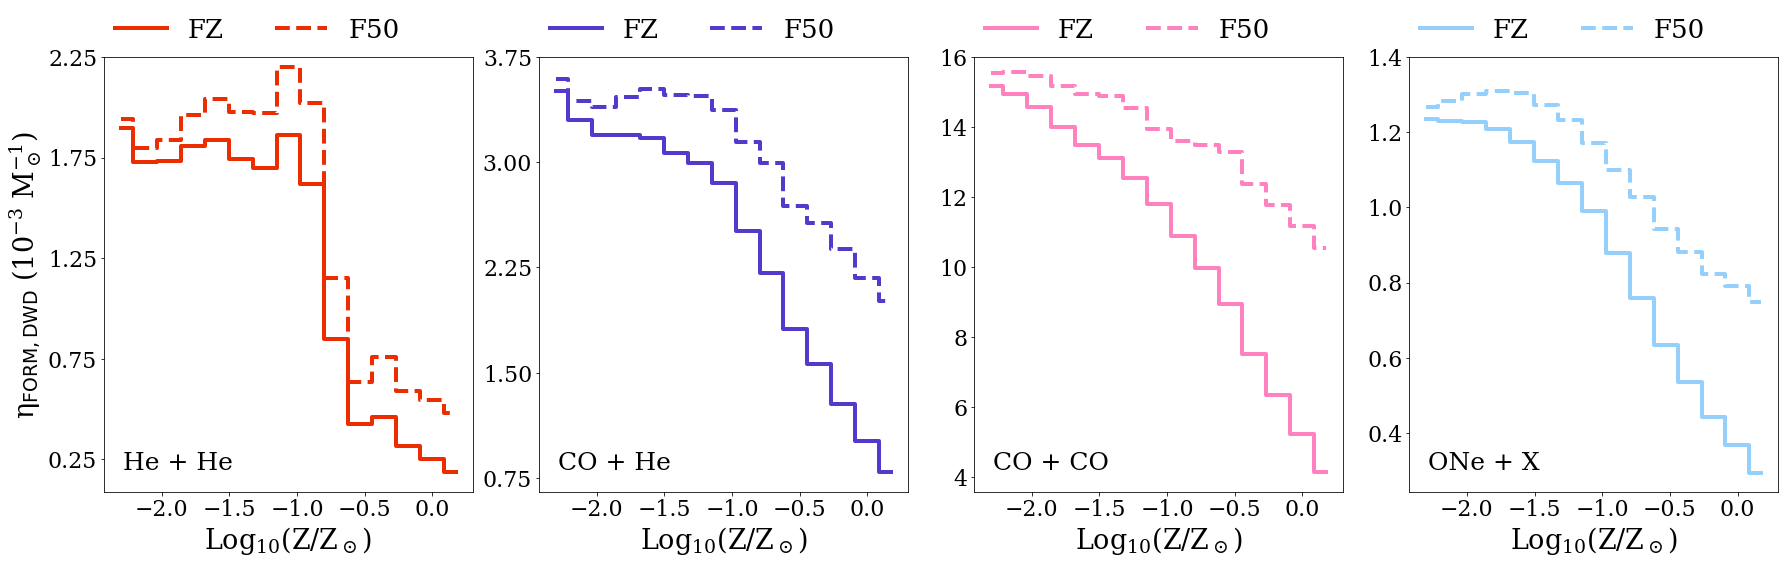

()

In [28]:
pathtoeff = 'formeff/'

DWDeff = pd.read_hdf(pathtoeff + 'DWDeff_FZ.hdf', key='data')
effHe = DWDeff.He.values
effCOHe = DWDeff.COHe.values
effCO = DWDeff.CO.values
effONe = DWDeff.ONe.values

DWDeff05 = pd.read_hdf(pathtoeff + 'DWDeff_F50.hdf', key='data')
effHe05 = DWDeff05.He.values
effCOHe05 = DWDeff05.COHe.values
effCO05 = DWDeff05.CO.values
effONe05 = DWDeff05.ONe.values

plot_formeff(effHe, effHe05, effCOHe, effCOHe05, effCO, effCO05, effONe, effONe05)

## Interaction Separation:

### Get separation data:
#### __(Careful when running next cell!! Will overwrite previous files)__

In [ ]:
from get_interactionsep import * \
pathtodat = '../reduced_datfiles/reduced_' \
pathtoLband = '../Lband/final_galaxy' # old Lband files are named "final_galaxy_<label>_<Z>_<binfrac>.hdf", 
                                      # whereas new are of the form Lband_<label>_<Z>_<binfrac>.hdf, so include 
                                      # prefix in path and it will add "_<label>_<Z>_<binfrac>.hdf for you \
get_intersep(pathtodat, pathtoLband) \


Can plot either first instance of CE or first instance of RLOF by specifying "whichsep". These are usually the same though!

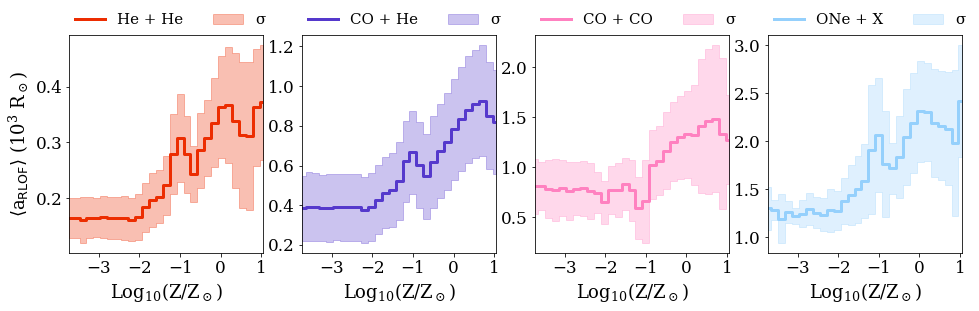

In [41]:
pathtointer = 'intersepfiles/'

Heinter = pd.read_hdf(pathtointer+'He_He_intersep_FZ.hdf', key='data')
COHeinter = pd.read_hdf(pathtointer+'CO_He_intersep_FZ.hdf', key='data')
COinter = pd.read_hdf(pathtointer+'CO_CO_intersep_FZ.hdf', key='data')
ONeinter = pd.read_hdf(pathtointer+'ONe_intersep_FZ.hdf', key='data')

plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='CEsep')

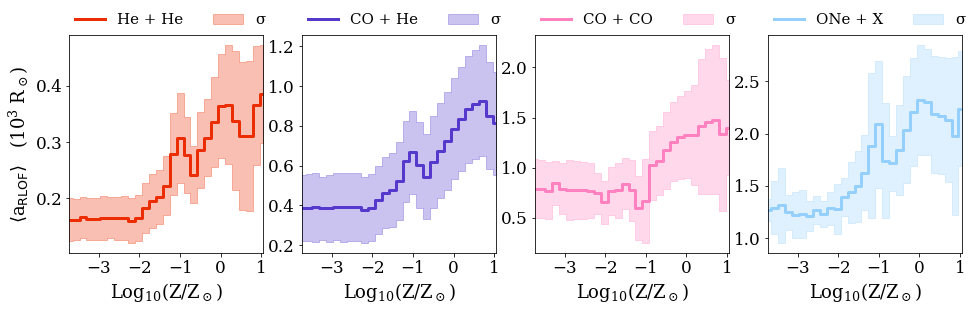

In [43]:
Heinter = pd.read_hdf(pathtointer+'He_He_intersep_F50.hdf', key='data')
COHeinter = pd.read_hdf(pathtointer+'CO_He_intersep_F50.hdf', key='data')
COinter = pd.read_hdf(pathtointer+'CO_CO_intersep_F50.hdf', key='data')
ONeinter = pd.read_hdf(pathtointer+'ONe_intersep_F50.hdf', key='data')

plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='CEsep')

## Number of LISA systems:
### Get LISA number data:
#### __(Careful when running next cell!! Will overwrite previous files)__

In [57]:
pathtoLband = '../Lband/'

get_numLISA(pathtoLband, 'old')

finished He + He
finished CO + He
finished CO + CO
finished ONe + X
finished He + He, F50
finished CO + He, F50
finished CO + CO, F50
finished ONe + X, F50


Once you have the data, it can be plotted:

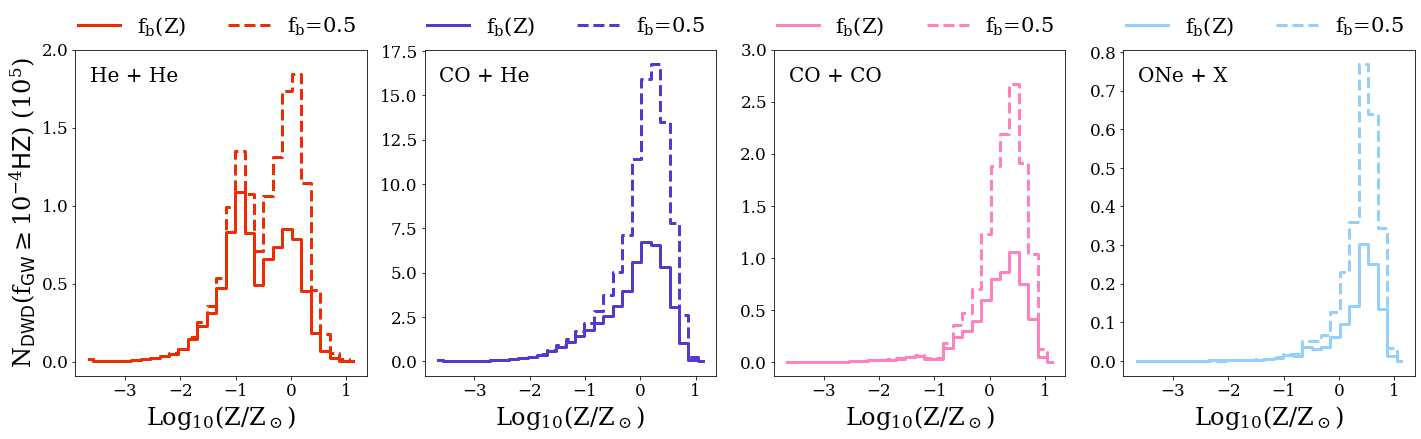

In [64]:
numsFZ = pd.read_hdf('numLISA/numLISA_30bins.hdf', key='data')
numsF50 = pd.read_hdf('numLISA/numLISA_30bins_05.hdf', key='data')
make_numLISAplot(numsFZ, numsF50)

# LISA Plots:
#### For LISA plots, you need SNR. The current LISAband data files I sent don't take into account the new sensitivity curve that would be created from the lower number of DWDs. The new creation functions don't include an SNR column, as they will have to be created self-consistently.
## Chirp Mass Grid plot:

In [115]:
obs_sec = 4 * u.yr.to('s')
obs_hz = 1 / obs_sec

3354 8282 1039 342


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


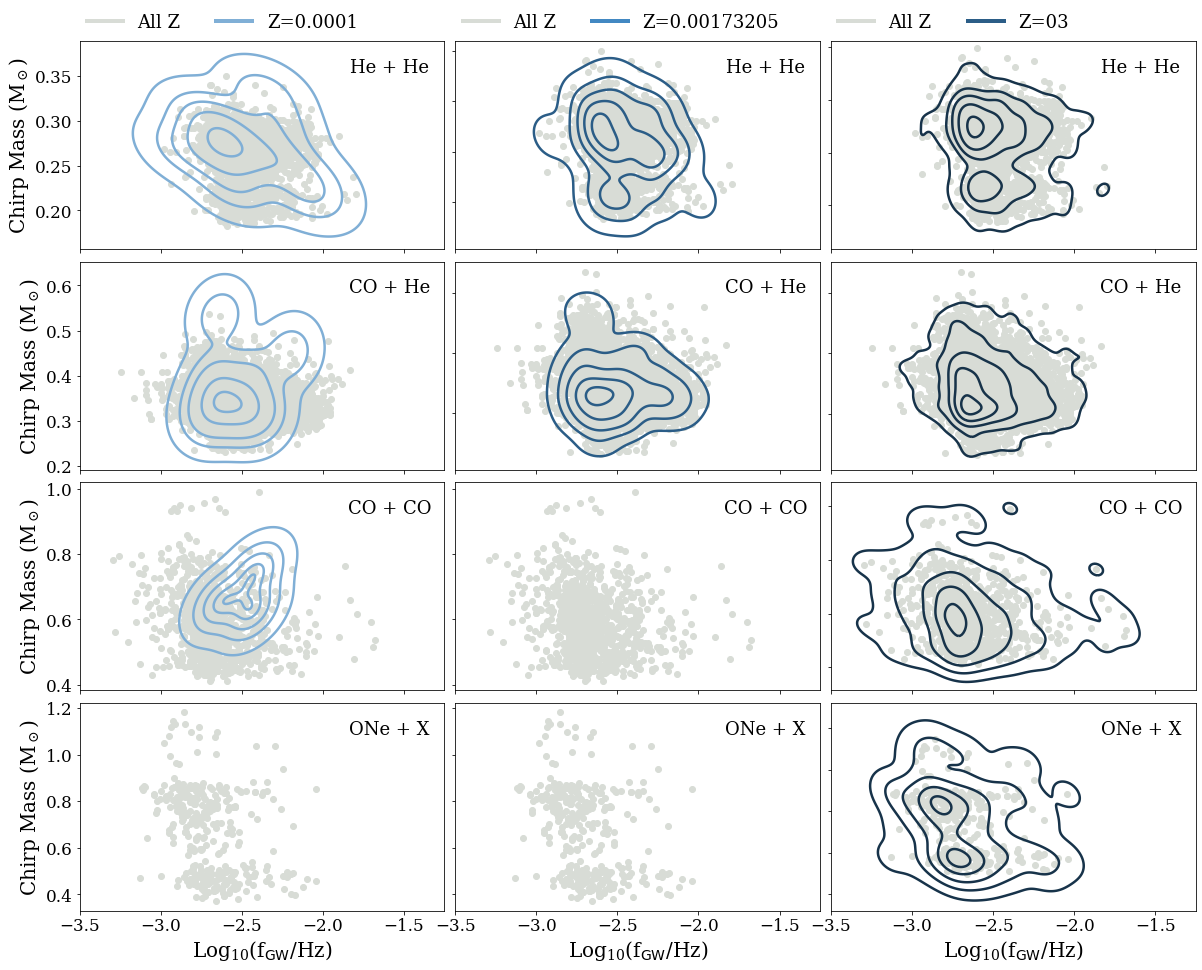

In [116]:
pathtoLband = '../Lband/'
make_Mc_fgw_plot(pathtoLband, 'FZold')

6830 18995 2638 756


LinAlgError: singular matrix

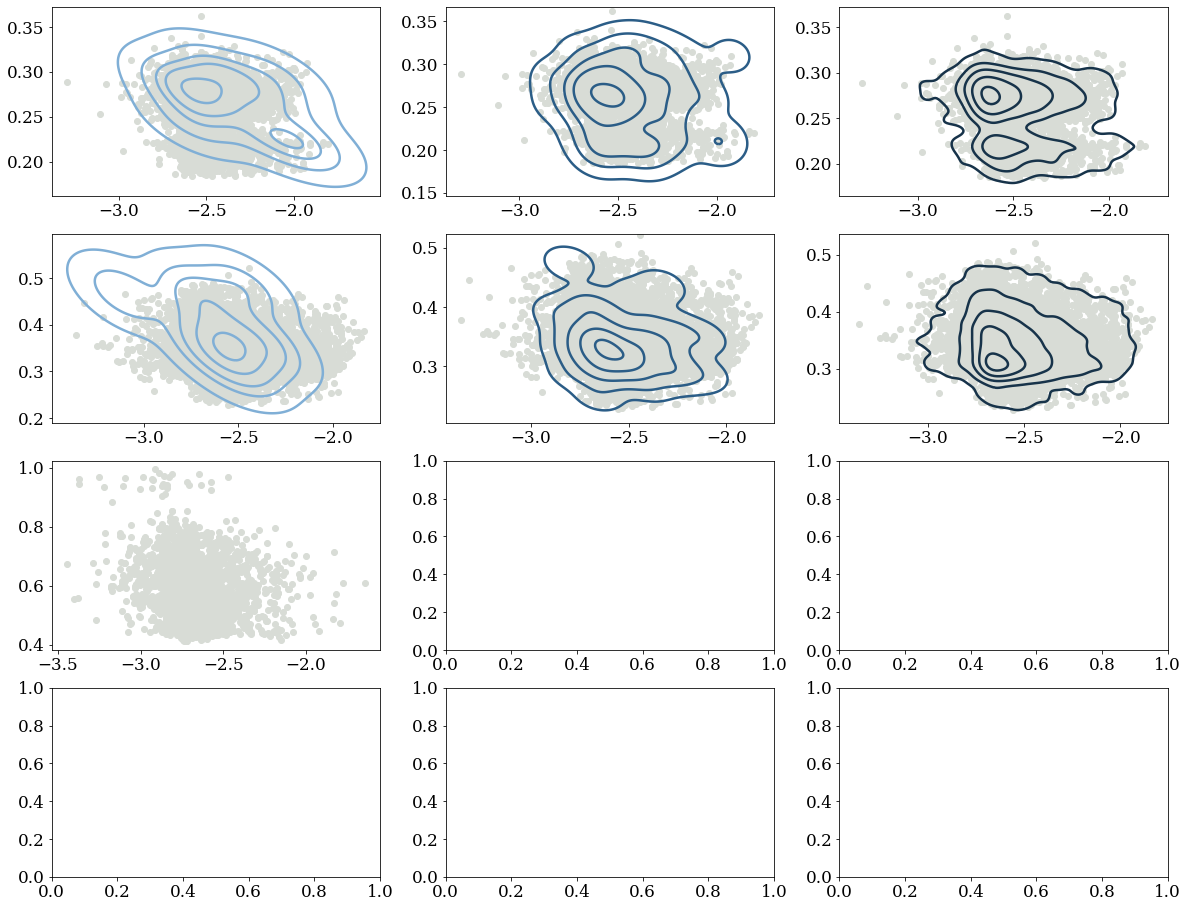

In [117]:
pathtoLband = '../Lband/'
make_Mc_fgw_plot(pathtoLband, 'F50old')

## SNR plots:
These also require SNR's, so this column can be overwritten with new SNR calculations 

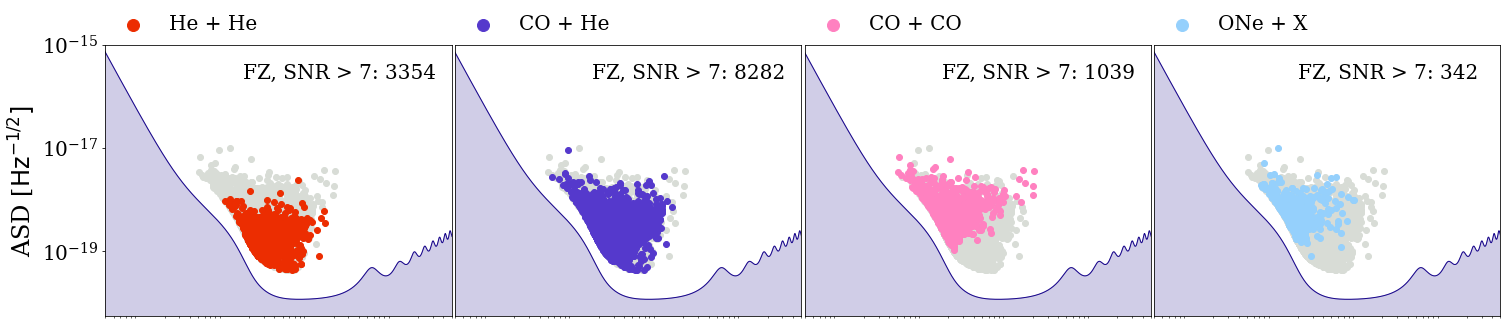

In [17]:
plot_LISAcurves('../Lband/', 'FZold')

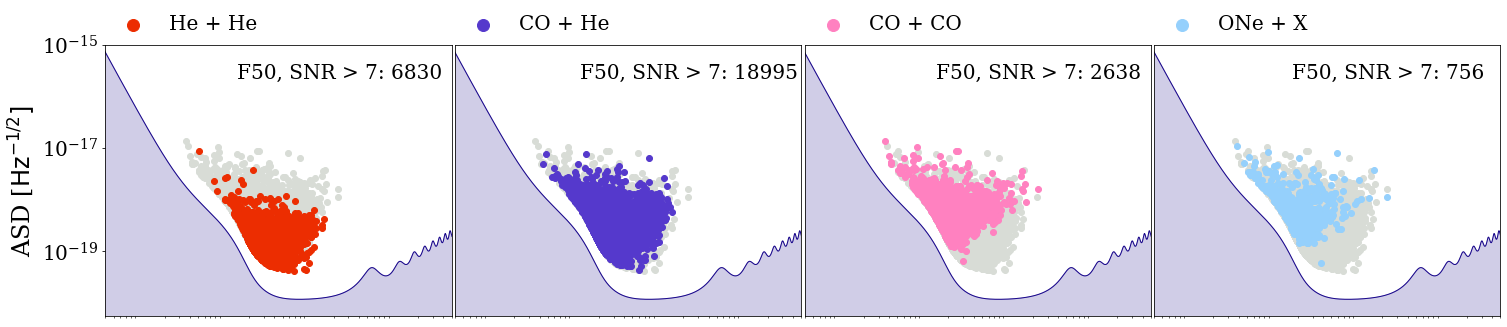

In [24]:
plot_LISAcurves('../Lband/', 'F50old')

## Other random plots:

In [78]:
He = pd.DataFrame()
for f in galaxy_files_10_10_var():
    He = He.append(pd.read_hdf(pathtoLband + f, key='Lband'))

CO = pd.DataFrame()
for f in galaxy_files_11_11_var():
    CO = CO.append(pd.read_hdf(pathtoLband + f, key='Lband'))

COHe = pd.DataFrame()
for f in galaxy_files_11_10_var():
    COHe = COHe.append(pd.read_hdf(pathtoLband + f, key='Lband'))

ONe = pd.DataFrame()
for f in galaxy_files_12_var():
    ONe = ONe.append(pd.read_hdf(pathtoLband + f, key='Lband'))
Xall = He.xGx
Xall = Xall.append(COHe.xGx)
Xall = Xall.append(CO.xGx)
Xall = Xall.append(ONe.xGx)
Yall = He.yGx
Yall = Yall.append(COHe.yGx)
Yall = Yall.append(CO.yGx)
Yall = Yall.append(ONe.yGx)
Zall = He.zGx
Zall = Zall.append(COHe.zGx)
Zall = Zall.append(CO.zGx)
Zall = Zall.append(ONe.zGx)

In [106]:
X = He.loc[He.snr>7].xGx
X = X.append(COHe.loc[COHe.snr>7].xGx)
X = X.append(CO.loc[CO.snr>7].xGx)
X = X.append(ONe.loc[ONe.snr>7].xGx)
Y = He.loc[He.snr>7].yGx
Y = Y.append(COHe.loc[COHe.snr>7].yGx)
Y = Y.append(CO.loc[CO.snr>7].yGx)
Y = Y.append(ONe.loc[ONe.snr>7].yGx)

(-200.0, 200.0)

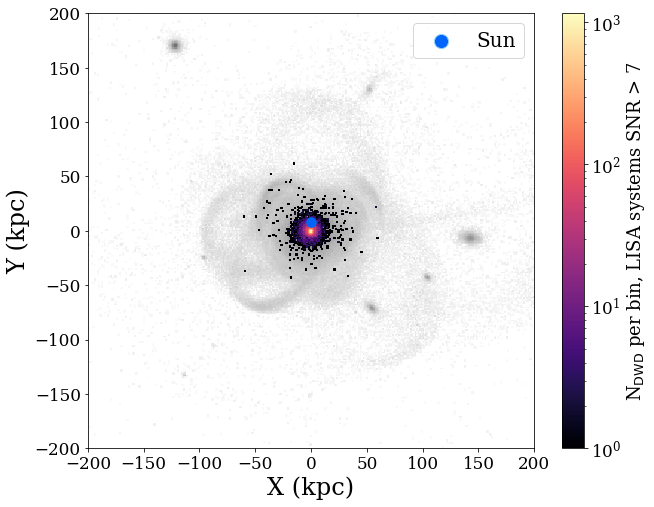

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))
flag = (np.abs(Xall)<200)&(np.abs(Yall)<200)

h, xbinx, ybinx, img = ax.hist2d(X, Y, bins=100, norm=col.LogNorm(), cmap='magma', label='SNR > 7')
cb = fig.colorbar(img)
cb.ax.set_ylabel(r'N$_{\rm{DWD}}$ per bin, LISA systems SNR > 7', fontsize=18)
h, xbinx, ybinx, _ = plt.hist2d(Xall[flag], Yall[flag], norm=col.LogNorm(), bins=300, 
                                cmap='Greys', zorder=0);
#plt.colorbar()
plt.scatter(0, sun_yGx, edgecolor='xkcd:light blue', facecolor='xkcd:bright blue', s=2, label='Sun')
plt.scatter(0, sun_yGx, facecolor='xkcd:bright blue', s=90)
#cb.ax.set_ylabel('LogNormed Density')
plt.legend(fontsize=20, markerscale=10)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.xlim(-200, 200)
plt.ylim(-200, 200)

(-0.3, 20.0)

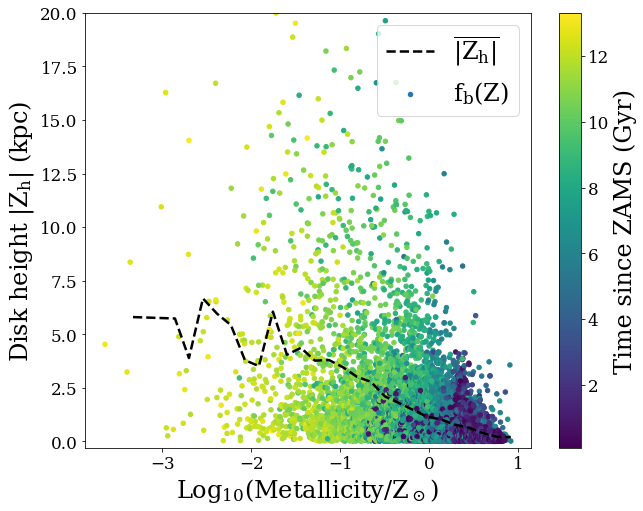

In [111]:
import legwork.visualisation as vis
alldata = He.append(COHe.append(CO.append(ONe)))
alldata = alldata.loc[(alldata.snr >=7)&(alldata.fdot>=obs_hz**2)]

avgs = []
bins = np.logspace(np.log10(alldata.met.min()), np.log10(alldata.met.max()), 30)
for i in range(len(bins)-1):
    metlow = bins[i]
    methigh = bins[i+1]
    chunk = alldata.loc[(alldata.met>=metlow)&(alldata.met<=methigh)]
    if len(chunk) <= 1:
        avgs.append(0)
        continue
    Zh = np.abs(chunk.Z.values)
    avg = np.mean(Zh)
    avgs.append(avg)
avgs = np.array(avgs)

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(np.log10(alldata.met), np.abs(alldata.Z.values), s=20, c=alldata.age, label='f$_b$(Z)')
plt.plot(np.log10(bins[1:][avgs>0]), avgs[avgs>0], color='k', lw=2.5, ls='--', label=r'$\overline{|Z_h|}$')
#plt.plot(np.log10(bins[1:]), avgs_05, color='xkcd:royal blue', lw=2, ls='-', label=r'$\overline{|Z_h|}$, f$_b$ = 0.5')
plt.xlabel('Log$_{10}$(Metallicity/Z$_\odot$)')
plt.ylabel('Disk height |Z$_h$| (kpc)')
cb = plt.colorbar(label='Time since ZAMS (Gyr)')
plt.legend()
plt.ylim(-0.3, 20)